In [1]:
## Importing Pandas and MatPlotlib Library

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## loading the DataSets (taken from Kaggle)

trn_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
## Dropping all NaN values from CSV .

trn_df = trn_df.dropna()
test_df = test_df.dropna()

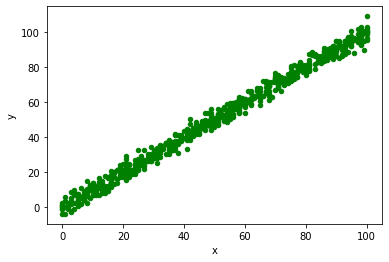

In [4]:
## Plotting the training Set .
## From the graph , it is clearly visible that this straight line has a slope of ~1 with 0 intercept .

trn_axs = plt.gca()
trn_df.plot(kind='scatter',x='x',y='y',ax=trn_axs,color='green')
plt.show()

In [5]:
## Adding an extra column in DataFrame of all 1s .

trn_df.insert(0, 'x1', 1)

In [6]:
## Segragating the Input and Output .

compdf = trn_df[['x1','x']]
result = trn_df[['y']]

In [7]:
## Setting initial values of Theta and alpha(also known as learning rate , or aggresiveness)

theta = [0.0, 0.0]
alpha = 0.0005

In [8]:
## The Cost Function defined :
## theta_sr is the Pandas Series containing Theta.
## H is the hypothesis
## smatn is the summation of Calculated value of product
## m is the number of the rows

def costfunction():
    theta_sr = pd.Series(theta)
    H = (compdf.values.dot(theta_sr.transpose()))
    H = pd.DataFrame(H, columns = ['y'], index = result.index)
    H = H - result
    H['y'] = H['y']**2
    smatn = H['y'].sum()
    m = H['y'].count()
    return (smatn/(2*m))

In [9]:
## The Gradient Descent Algorithm function .

def gradientDescent():
    theta_sr = pd.Series(theta)
    H = (compdf.values.dot(theta_sr.transpose()))
    H = pd.DataFrame(H, columns = ['y'], index = result.index)
    H = H - result
    m = H['y'].count()
    temp0 = alpha*((H['y'].sum())/m)
    
    tmp = H['y']*compdf['x']
    temp1 = alpha*((tmp.sum())/m)
    
    theta[0] = theta[0] - temp0
    theta[1] = theta[1] - temp1

In [10]:
## The Regression Function , which accumulates cost of the every theta getting calculated , and applying Gradient
## Descent on every loop , for the correction of theta values .

def regression():
    run = pd.DataFrame()
    for x in range(1,1000):
        run = run.append({'Run':x, 'Cost':costfunction()},ignore_index=True)
        gradientDescent()
    return run

In [11]:
costgrf = regression()

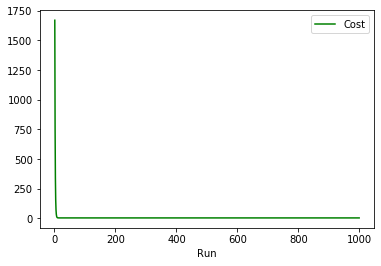

In [12]:
## Plotting of the Regression run , from the graph it is visible that the result saturated long back .

rgrsngrf = plt.gca()
costgrf.plot(kind='line',x='Run',y='Cost',ax=rgrsngrf,color='green')
plt.show()

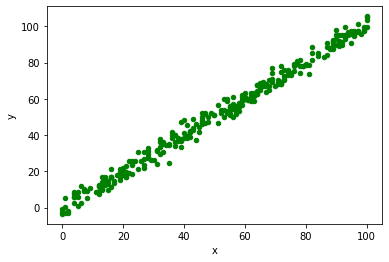

In [13]:
## Plotting the data of test set .

test_axs = plt.gca()
test_df.plot(kind='scatter',x='x',y='y',ax=test_axs,color='green')
plt.show()

In [14]:
## Check function , to use the calculated theta values to predict values and compare it with the result given .
## If the value difference in prediction , is of +- 3 , it is treated as acceptable , else , it outputs wrong
## results , with Predicted value and actual value .

def check():
    for x,y in test_df.itertuples(index=False):
        pred = theta[0]+(x*theta[1])
        pred = round(pred,2)
        
        y = round(y,2)
        
        if (abs(pred-y)<=3):
            print('Correct Prediction !')
        else:
            print('Incorrect Prediction {} {}'.format(pred,y))

check()

Correct Prediction !
Correct Prediction !
Incorrect Prediction 21.98 25.61
Correct Prediction !
Incorrect Prediction 35.97 41.85
Incorrect Prediction 14.99 9.81
Incorrect Prediction 61.94 58.87
Correct Prediction !
Correct Prediction !
Incorrect Prediction 5.0 8.75
Correct Prediction !
Correct Prediction !
Correct Prediction !
Correct Prediction !
Incorrect Prediction 35.97 40.25
Correct Prediction !
Correct Prediction !
Correct Prediction !
Incorrect Prediction 86.92 90.66
Incorrect Prediction 68.93 77.23
Incorrect Prediction 88.92 92.12
Incorrect Prediction 50.95 46.91
Correct Prediction !
Incorrect Prediction 26.97 21.71
Correct Prediction !
Correct Prediction !
Correct Prediction !
Correct Prediction !
Correct Prediction !
Correct Prediction !
Correct Prediction !
Correct Prediction !
Correct Prediction !
Correct Prediction !
Incorrect Prediction 27.97 33.07
Incorrect Prediction 46.96 51.7
Correct Prediction !
Correct Prediction !
Correct Prediction !
Incorrect Prediction 32.97 36.